In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

sys.path.append("../modules")
from DS_data_transformation import this_ax
from DS_models_stat import b20_coef
from DS_Planck_Unet import west_val, east_val
%config InlineBackend.figure_format = 'retina'

In [2]:
matplotlib.rcParams["font.size"] = 15

In [3]:
def change_names(name):
    if name == 'eb20':
        return ''
    if name in ['41', '6', '38']:
        return 'pixel ' + name
    if name == 'all_true':
        return 'PSZ2(z)+MCXC+ACT'
    return name

In [6]:
def show_prm(ax, pixname, selected_det, selected_tr, index_name='auto', ylabel='', xlim=[0, 1], xticks=None,
            only_plot=False, colors='brycg', found_mode=False, coef=1.0, xlog=False, ylog=False, 
             fylim=[0, 200], fyticks=[0, 200, 50], xlabel=None):
    #cats = ['SZcat(base)',  'SZcat(AL)', 'SZcat(y-map)', 'gen', 'SZcat(AL)_unique', 'inter', 'SZcat(y-map)_unique']
    index_auto = {
        'SZcat(base)' : 'max_pred',
        'SZcat(AL)' : 'max_pred',
        'SZcat(y-map)' : 's/n', 
        'SZcat(gen)' : 'mpp_er', 
        'SZcat(AL)_unique' : 'max_pred', 
        'inter' : 'max_pred',
        'inter_sn' : 's/n',
        'SZcat(AL)_unique' : 'max_pred'
    }
    if index_name == 'auto':
        index_name = index_auto[selected_det[0]]
        
    for name in selected_det:
        print('\'{}_recall_{}_pix{}.csv\''.format(name, index_name.replace('/', ''), pixname), 
                                  end=" ")
    recalls = {name : pd.read_csv('../check1/{}_recall_{}_pix{}.csv'.format(
                                name, index_name.replace('/', ''), pixname), 
                                  index_col=index_name)
                  for name in selected_det}

    for c, name_tr in zip(colors, selected_tr):
        for name_det, st in zip(recalls, ['-', '--']):
            df = recalls[name_det]
            s, = ax.plot(df.index, df[name_tr] * coef, c=c, linestyle=st, marker='o', markersize=3)
            s.set_label(change_names(name_tr) + ' ' + name_det + ' ' + change_names(pixname))
    if not only_plot:
        ax.set_ylabel(ylabel)
        if xlabel is None:
            xlabel = index_name
        ax.set_xlabel(xlabel)

        if xticks is None:
            xticks = df.index
        if selected_det[0] == 'SZcat(AL)':
            ax.set_xticks(xticks[::2], minor=False)
        else:
            ax.set_xticks(xticks, minor=False)
            
        ax.set_xlim(xlim)
        if xlog:
            ax.set_xscale('log')
        if ylog:
            ax.set_yscale('log')
        
        if not found_mode:
            ax.set_yticks(np.arange(0, 1.1, 0.1), minor=False)
            ax.set_ylim(0, 1.05)
        else:
            ax.set_yticks(np.arange(*fyticks))
            ax.set_ylim(*fylim)

        ax.grid(True, axis='both', which='major', linestyle=':')
        ax.grid(True, axis='both', which='minor', alpha=0.2, linestyle=':')
        ax.legend()

'SZcat(AL)_recall_max_pred_pix41.csv' 'SZcat(base)_recall_max_pred_pix41.csv' 

FileNotFoundError: [Errno 2] No such file or directory: '../check1/SZcat(AL)_recall_max_pred_pix41.csv'

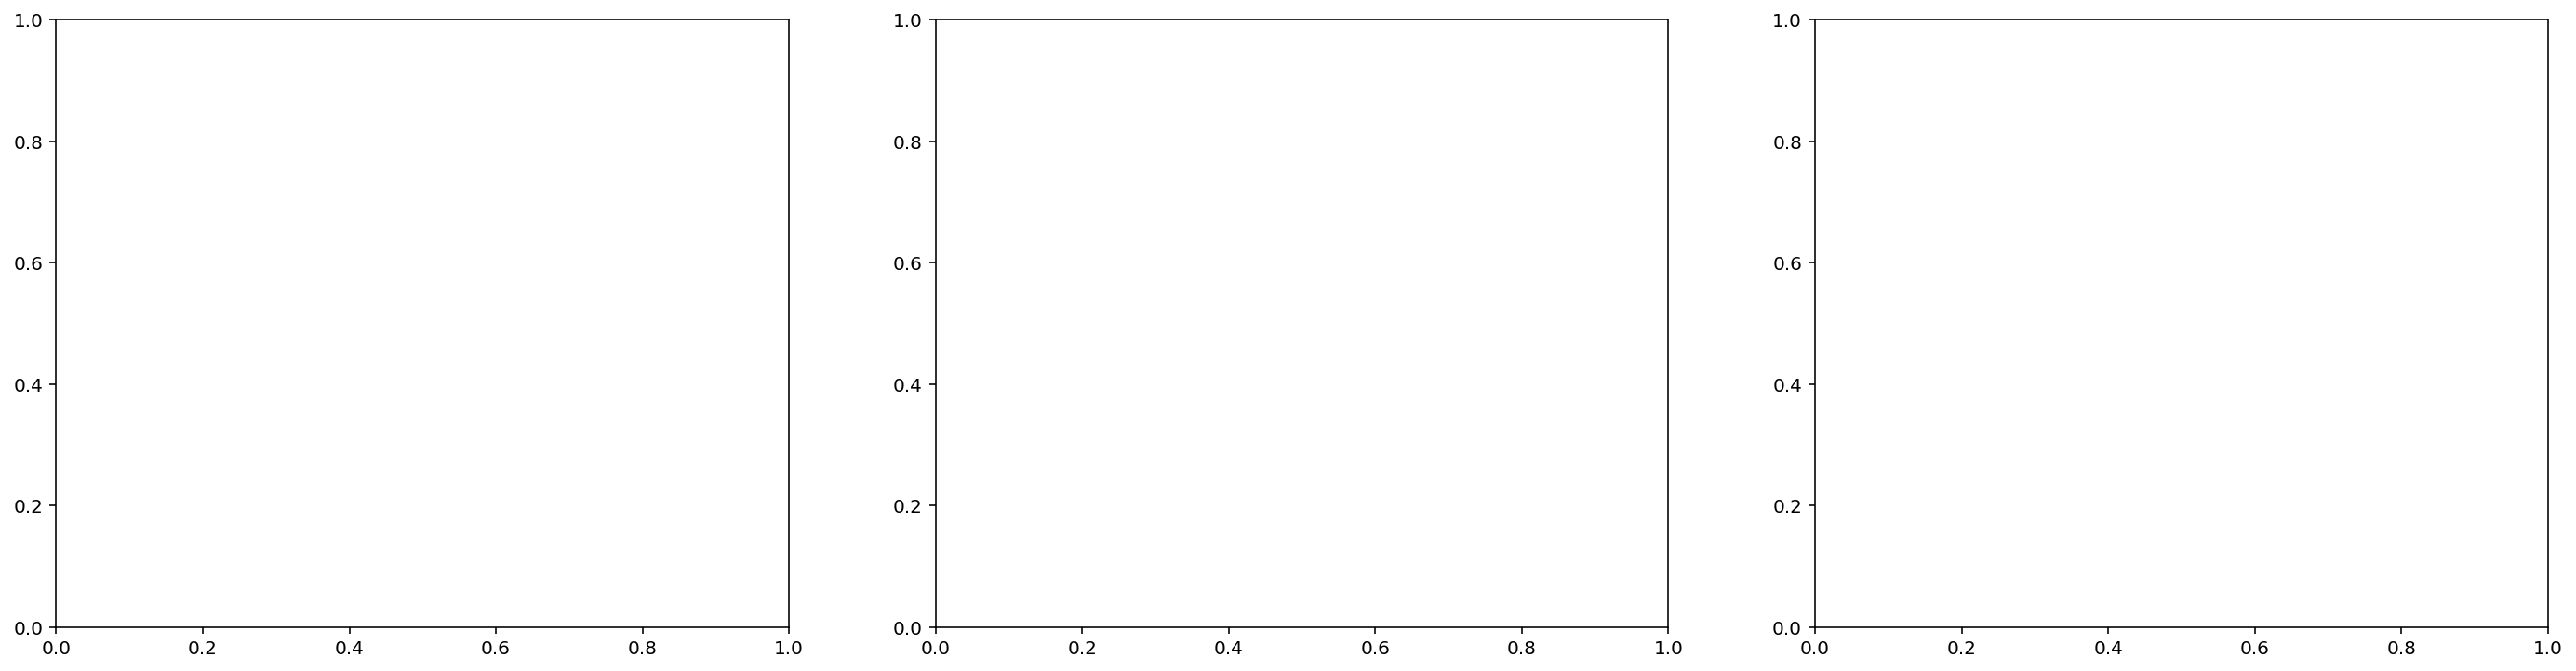

In [7]:
_, ax = plt.subplots(1, 3, figsize=(24, 6), sharey=False)

selected_det_list = (['SZcat(AL)', 'SZcat(base)'], ['SZcat(y-map)'], ['SZcat(gen)'])
xlim_list = ([0.18, 1.0], [5.22, 12], [0.35, 1.0])
xlogs = [False, True, False]
xlabels_list = ['$p_{max}$', None, '$Precision_{X}$']
xticks_list = [np.arange(0.1, 1, 0.1), None, np.arange(0, 1, 0.1)]
for i, (selected_det, xlim, xlog, xlabel, xticks) in enumerate(zip(selected_det_list, xlim_list, xlogs, xlabels_list, xticks_list)):
    pixname_list = ['41', 'eb20']
    selected_tr_list = (['precision'], ['precision_eROSITA'])
    colors_list = ['kb', 'rc']
    for pixname, selected_tr, colors in zip(pixname_list, selected_tr_list, colors_list):
        show_prm(ax[i], pixname, selected_det, selected_tr, colors=colors, only_plot=False, xlim=xlim, xlog=xlog, 
                xlabel=xlabel, xticks=xticks)

plt.tight_layout()